# Importing the Necessary Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [721]:
#file_name = '../original/D31.csv'
#file_name = '../original/g2-2-50.csv'
#file_name = '../original/g2-2-30.csv'
dataset_clusters = 2

#file_name = 'noised/g2-2-30.csv'
#file_name = 'evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

# To get file in "result" folder use "HDBSCAN.py" 
#file_name = '../result2/t4.8k.csv'
#file_name = '../result2/t5.8k.csv'
#file_name = '../result2/t8.8k.csv'
#file_name = '../result2/t7.10k.csv'

#file_name = '../result2/g2-2-30.csv'
#file_name = '../result2/varying_densities.csv'


In [829]:
# Overlapped Datasets
#file_name = '../BS3WC-Datasets/overlapped/scene.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-beach.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-sunset.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-fall.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-field.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-mountain.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-urban.csv'

#file_name = '../BS3WC-Datasets/overlapped/birds.csv'

# Systhetic Datasets
#file_name = '../BS3WC-Datasets/Synthetic/a3.csv'
#file_name = '../BS3WC-Datasets/Synthetic/Aggregation.csv'
#file_name = '../BS3WC-Datasets/Synthetic/Compound.csv'
file_name = '../BS3WC-Datasets/Synthetic/dim128.csv'
#file_name = '../BS3WC-Datasets/Synthetic/dim512.txt'
#file_name = '../BS3WC-Datasets/Synthetic/flame.txt'
#file_name = '../BS3WC-Datasets/Synthetic/jain.txt'
#file_name = '../BS3WC-Datasets/Synthetic/pathbased.txt'
#file_name = '../BS3WC-Datasets/Synthetic/R15.txt'
#file_name = '../BS3WC-Datasets/Synthetic/s1.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/s2.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/spiral.txt'
#file_name = '../BS3WC-Datasets/Synthetic/unbalance.txt'
#dataset_clusters = 8

# Real Datasets
#file_name = '../BS3WC-Datasets/Real/CNAE-9.data'
#file_name = '../BS3WC-Datasets/Real/dermatology.data'
#file_name = '../BS3WC-Datasets/Real/ecoli.data'
#file_name = '../BS3WC-Datasets/Real/glass.data'
#file_name = '../BS3WC-Datasets/Real/iris.data'
#file_name = '../BS3WC-Datasets/Real/seeds_dataset.data'
#file_name = '../BS3WC-Datasets/Real/segmentation.data'
#file_name = '../BS3WC-Datasets/Real/thyroid0387.data'
#file_name = '../BS3WC-Datasets/Real/waveform.data'
#file_name = '../BS3WC-Datasets/Real/waveform2.data'
#file_name = '../BS3WC-Datasets/Real/wdbc.data'
#file_name = '../BS3WC-Datasets/Real/wine.data'
#file_name = '../BS3WC-Datasets/Real/yeast.data'


In [830]:
data = pd.read_csv(file_name)

In [831]:
folder_name = '../images-visual'
#folder_name = '../images-visual'
split_arr = file_name.split('/')
if '.csv' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
if '.txt' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.txt','').lower()
    
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
open(file_measures,"w+")

dim128


<_io.TextIOWrapper name='../Measurements/dim128-measures.txt' mode='w+' encoding='UTF-8'>

In [832]:
from sklearn.metrics.cluster import normalized_mutual_info_score
    
def calculate_NMI(inside_points, labels, ground_truth, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    nmi = normalized_mutual_info_score(X, Y)
    print("Normalized Mutual Information (" + caption + "): %0.4f"% nmi)
    file.write("Normalized Mutual Information (" + caption + "): %0.4f\n"% nmi)


In [833]:
#calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [834]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate_ARI(inside_points, labels, ground_truth, file_name, caption, no_outliers=False):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    ari = adjusted_rand_score(X, Y)
    
    print("Adjusted Random Index (" + caption + "): %0.4f"% ari)
    file.write("Adjusted Random Index (" + caption + "): %0.4f\n"% ari)


In [835]:
#calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [836]:
def calculate_db_index(inside_points, labels, file_name, caption):
    from sklearn.metrics import davies_bouldin_score 
    import sklearn
    file = open(file_name, "a+")
    
    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    db_index = davies_bouldin_score(X, Y)
    print("DB Index Score (" + caption + "): %0.4f\n"% db_index)
    file.write("DB Index Score (" + caption + "): %0.4f\n"% db_index)

In [837]:
#calculate_db_index(final_inside, clusters_labels, file_measures)

In [838]:
def calculate_silhouette_score(inside_points, labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    #X = np.array(X)
    #Y = np.array(Y)
    
    silhouette_coef = metrics.silhouette_score(X, Y)
    print("Silhouette Coefficient (" + caption + "): %0.4f"% silhouette_coef)
    file.write("Silhouette Coefficient (" + caption + "): %0.4f\n"% silhouette_coef)


In [839]:
def calculate_silhouette_samples(sampled_df, features, clusters, file_name, caption):
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    X = np.array(sampled_df[features])
    Y = np.array(sampled_df['L'])
    
    for i in range(c_k_o_i.shape[0]):
        actual_val = Y[i] 
        if i%20 == 0:
            print(i)
        for j in range(c_k_o_i.shape[1]):
            Y[i] = j
            silhouette_coefs = metrics.silhouette_samples(X, Y)
            c_k_o_i[i][j] = silhouette_coefs[i]
        
        Y[i] = actual_val
    
    #for f in inside_points:
    #    X.append(f)
    #    Y.append(labels[f])
    #silhouette_coefs = metrics.silhouette_samples(X, Y)
    
    return c_k_o_i

In [840]:
def getCentroids(clusters_labels, sampled_df, features):
    clusters = np.unique(clusters_labels)
    centroids = {}
    for i in clusters:
        cluster_dataset = sampled_df[features].loc[sampled_df['L'] == i]
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroids[i] = sum_of_cluster/len(cluster_dataset)
        
    return centroids

In [841]:
#cluster_centroids = getCentroids(clusters_labels, sampled_df, features)

In [842]:
def getCentroidNearest(clusters_labels, centroids):
    clusters = np.unique(clusters_labels)
    centroids_nearest = {}
    centroids_nearest_dist = {}
    
    for i in clusters:
        distance_sum = 0
        distance_min = 0
        centroids_nearest[i] = 0
        flag = False
        
        for j in clusters:
            if j == i:
                continue

            for col in features:
                distance_sum += (centroids[i][col] - centroids[j][col])**2
            if not flag:
                distance_min = distance_sum
                centroids_nearest[i] = j
                centroids_nearest_dist[i] = sqrt(distance_sum)
                flag = True
            else: 
                if distance_min > distance_sum:
                    distance_min = distance_sum
                    centroids_nearest[i] = j
                    centroids_nearest_dist[i] = sqrt(distance_sum)

    return centroids_nearest, centroids_nearest_dist

In [843]:
#centroids = getCentroids(clusters_labels, sampled_df)
#centroids_nearest, centroids_nearest_dist = getCentroidNearest(clusters_labels, centroids)

In [844]:
#centroids

In [845]:
#centroids_nearest

In [846]:
#centroids_nearest_dist

In [847]:
def calculate_silhouette_samples_2(sampled_df, features, clusters, file_name):
    file = open(file_name, "a+")
    
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    X = np.array(sampled_df[features])
    Y = np.array(sampled_df['L'])
    
    for i in range(c_k_o_i.shape[0]):
        data_point = sampled_df[features].iloc[i]
        if i%20 == 0 and i != 0:
            print(i)
            #print(c_k_o_i[i-1][j-1])
            
        for j in range(c_k_o_i.shape[1]):
            cluster_dataset = sampled_df[features].loc[sampled_df[label_col_name] == j]
            average_distance = 0
            
            for index, c_point in cluster_dataset.iterrows():
                distance_sum = 0
                for col in features:
                    distance_sum += (data_point[col] - c_point[col])**2
                        
                distance = sqrt(distance_sum)
                average_distance += distance
            
            average_distance = average_distance/len(cluster_dataset)
            a = average_distance
            
            #silhouette_coefs = metrics.silhouette_samples(X, Y)
            distance_sum = 0
            for col in features:
                distance_sum += (data_point[col] - centroids[centroids_nearest[j]][col])**2

            b = sqrt(distance_sum)
            
            c_k_o_i[i][j] = (b - a)/max(a,b)
        
    return c_k_o_i

In [848]:
def calculate_silhouette_samples_3(sampled_df, features, clusters_labels, file_name):
    file = open(file_name, "a+")

    clusters = np.unique(clusters_labels)
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    X = np.array(sampled_df[features])
    Y = np.array(sampled_df['L'])

    cluster_centroids = getCentroids(clusters, sampled_df, features)
    
    for i in range(c_k_o_i.shape[0]):
        data_point = sampled_df[features].iloc[i]
        if i%500 == 0 and i != 0:
            print(i)

        for j in range(c_k_o_i.shape[1]):

            count = 0
            distance_min = 0
            for clust in range(c_k_o_i.shape[1]):
                if clust == j:
                    continue
                distance_sum = 0
                for col in features:
                    distance_sum += (data_point[col] - cluster_centroids[clust][col])**2
                
                if count == 0:
                    distance_min = distance_sum
                    count += 1
                else:
                    if distance_sum < distance_min:
                        distance_min = distance_sum
            
            ##########################################################
            distance_sum1 = 0
            for col in features:
                distance_sum1 += (data_point[col] - cluster_centroids[j][col])**2

            a = sqrt(distance_sum1)
            b = sqrt(distance_min)
            
            c_k_o_i[i][j] = (b - a)/max(a,b)
        
    return c_k_o_i

In [849]:
#c_k_o_i_3 = calculate_silhouette_samples_3(sampled_df, features, clusters_labels, folder_name + '/' + identity_name + '-normal-result2')

In [850]:
def calculate_accuracy(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    total = len(inside_points)
    for f in inside_points:
        if labels[f] == ground_truth[f]:
            correct += 1
    
    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)

#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures)

In [851]:
def calculate_confusion_matrix(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")
    
    unique_labels = np.unique(dataset['L'])
    confusion_matrices = {}
    
    print("length: ", len(inside_points))
    X = []
    Y = []
    
    for lab in unique_labels:
        confusion_matrices[lab] = [0,0,0,0]

    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                confusion_matrices[o_c['L']][0] += 1
            
                for lab in unique_labels:
                    if lab != o_c['L']:
                        confusion_matrices[lab][3] += 1
            else:
                if labels[key] == -1:
                    #continue # To check confusion matrix for other than outliers                    
                    for lab in unique_labels:
                        confusion_matrices[lab][2] += 1
                else:
                    confusion_matrices[labels[key]][1] += 1
            
                    for lab in unique_labels:
                        if lab != labels[key]:
                            confusion_matrices[lab][2] += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)*100

    print("Confusion Matrices (" + caption + "): " + str(confusion_matrices) )
    file.write("Confusion Matrices (" + caption + "): " + str(confusion_matrices) + "\n")

#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures)

# Data Description


In [852]:
def write_outliers_detected(final_inside,final_partial,final_outside,file_name, caption):
    file = open(file_name, "a+")
    file.write("Total Objects (" + caption + "): %0.4f\n"% (len(final_inside)+len(final_partial)+len(final_outside)))
    file.write("Outliers Detected By BS3 (" + caption + "): %0.4f\n"% (len(final_outside)+len(final_partial)))

In [853]:
data.head()

Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col119  \
0   145   142   131   135   208   209    65   128   183    131  ...     199   
1   149   148   137   137   213   209    71   125   183    125  ...     198   
2   151   144   135   132   210   208    67   124   183    128  ...     198   
3   148   141   136   135   207   209    65   127   184    130  ...     197   
4   146   145   136   135   208   212    70   130   185    129  ...     199   

   Col120  Col121  Col122  Col123  Col124  Col125  Col126  Col127  Col128  
0     218     182      53     144     198      93      34      99      79  
1     222     182      52     148     198      97      35      99      78  
2     218     182      52     144     196      93      38     101      78  
3     219     184      50     144     198      92      36     101      82  
4     217     182      52     148     198      95      36      96      80  

[5 rows x 128 columns]

In [854]:
data.shape

(1024, 128)

# Data Sampling

In [855]:
#sampled_df = data[(data['Col1']/data['Col1']) == 1]
sampled_df = data
sampled_df.shape

(1024, 128)

In [856]:
sampled_df.head()

Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col119  \
0   145   142   131   135   208   209    65   128   183    131  ...     199   
1   149   148   137   137   213   209    71   125   183    125  ...     198   
2   151   144   135   132   210   208    67   124   183    128  ...     198   
3   148   141   136   135   207   209    65   127   184    130  ...     197   
4   146   145   136   135   208   212    70   130   185    129  ...     199   

   Col120  Col121  Col122  Col123  Col124  Col125  Col126  Col127  Col128  
0     218     182      53     144     198      93      34      99      79  
1     222     182      52     148     198      97      35      99      78  
2     218     182      52     144     196      93      38     101      78  
3     219     184      50     144     198      92      36     101      82  
4     217     182      52     148     198      95      36      96      80  

[5 rows x 128 columns]

In [857]:
import csv

def write_to_file(file_name, values, header_names=False):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        if header_names:
            writer.writerow(header_names)
        writer.writerows(values)
        

# Statistics


In [858]:
sampled_df.describe().transpose()


count        mean        std   min     25%    50%     75%    max
Col1    1024.0  125.248047  51.254859  31.0   89.50  117.0  158.50  220.0
Col2    1024.0  150.040039  48.465458  45.0  129.50  145.0  191.00  225.0
Col3    1024.0  134.053711  49.652222  42.0  104.50  142.0  174.00  205.0
Col4    1024.0  134.069336  38.661577  46.0  100.75  139.5  167.00  195.0
Col5    1024.0  118.694336  54.941676  35.0   76.50  111.0  158.00  227.0
...        ...         ...        ...   ...     ...    ...     ...    ...
Col124  1024.0  117.336914  60.981599  32.0   60.75  113.5  181.25  209.0
Col125  1024.0  123.756836  46.710213  25.0   94.00  124.0  159.00  210.0
Col126  1024.0   99.931641  49.196389  27.0   63.00   87.5  128.25  194.0
Col127  1024.0  110.326172  60.645574  30.0   54.75   98.0  168.00  215.0
Col128  1024.0  151.151367  49.358342  58.0  114.75  179.5  190.00  204.0

[128 rows x 8 columns]

# Select Features of Interest for Clustering


In [859]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

elif 'dermatology' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30',
                'Col31', 'Col32', 'Col33', 'Col34']

#GLASS Dataset -OR- Nine Featured datasets
elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

elif 'scene' in file_name:
    features = ['Col'+str(i+1) for i in range(294)]

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']

select_df_test_flag = False
if 'Out' in sampled_df:
    select_df = sampled_df[sampled_df['Out'] == 1][features]
    select_df_test = sampled_df[sampled_df['Out'] != 1][features]
    select_df_test_out = sampled_df[sampled_df['Out'] == 3][features]
    select_df_test_flag = True
else:
    select_df = sampled_df[features]

#X = StandardScaler().fit_transform(select_df)
print(features)

../BS3WC-Datasets/Synthetic/dim128.csv
['Col1', 'Col2']


In [860]:
print(select_df.shape)
if select_df_test_flag:
    print(select_df_test.shape)

(1024, 2)


In [861]:
select_df.head()

Col1  Col2
0   145   142
1   149   148
2   151   144
3   148   141
4   146   145

In [862]:
num_of_clusters = 0

In [863]:
label_col_name = 'L'
#sampled_df.drop('L', axis=1, inplace=True)
#sampled_df

Centroids:  [ 91.85       120.88541667 167.5328125  180.91145833]
model
 [0 0 0 ... 0 0 0]


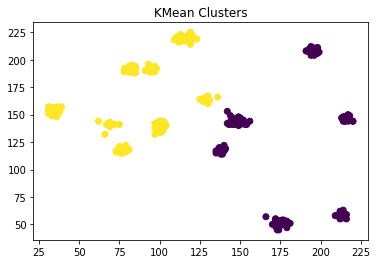

[0 1]
[0 1]


In [864]:
if 'L' in sampled_df:
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = dataset_clusters
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################

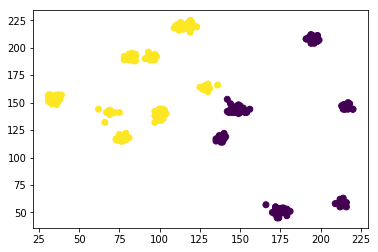

In [865]:
plt.scatter(sampled_df['Col1'], sampled_df['Col2'], c=sampled_df['L'])    

In [866]:
sampled_df.head()

Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col120  \
0   145   142   131   135   208   209    65   128   183    131  ...     218   
1   149   148   137   137   213   209    71   125   183    125  ...     222   
2   151   144   135   132   210   208    67   124   183    128  ...     218   
3   148   141   136   135   207   209    65   127   184    130  ...     219   
4   146   145   136   135   208   212    70   130   185    129  ...     217   

   Col121  Col122  Col123  Col124  Col125  Col126  Col127  Col128  L  
0     182      53     144     198      93      34      99      79  0  
1     182      52     148     198      97      35      99      78  0  
2     182      52     144     196      93      38     101      78  0  
3     184      50     144     198      92      36     101      82  0  
4     182      52     148     198      95      36      96      80  0  

[5 rows x 129 columns]

In [867]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if len(final_list) > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] == -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [868]:
colors = ['#006400', '#228B22', '#32CD32', '#0BDA51', '#39FF14', '#00FF7F', '#90EE90', '#D0F0C0', '#D0F0C0', '#F0FFF0']
len(colors)

10

In [869]:
def getColor(R):
        if   R <= 0.1: col = colors[9]
        elif R <= 0.2: col = colors[8]
        elif R <= 0.3: col = colors[7]
        elif R <= 0.4: col = colors[6]
        elif R <= 0.5: col = colors[5]
        elif R <= 0.6: col = colors[4]
        elif R <= 0.7: col = colors[3]
        elif R <= 0.8: col = colors[2]
        elif R <= 0.9: col = colors[1]
        elif R <= 1.0: col = colors[0]
        return col


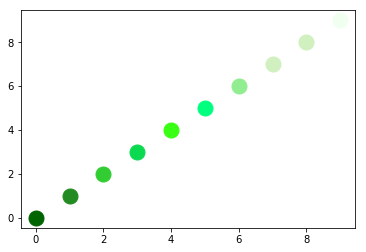

In [870]:
for i in range(10):
    plt.plot(i, i, '.', color=colors[i],  markersize=30)
plt.savefig(folder_name + '/Test.pdf', dpi=1500)  

In [871]:
def plot_custom_clusters_2(c_k_o_i, clusters_averages, clusters_labels, size, description, image_name, alpha=1, beta=0, not_outlier=False):
    X = np.array(select_df)
    
    for i in range(c_k_o_i.shape[0]):
        lab = int(sampled_df.iloc[i]['L'])
        if c_k_o_i[i][0] > 0:
            R = 1
        elif c_k_o_i[i][0] == 0:
            R = 0.6
        else:
            R = 0.2
        if c_k_o_i[i][1] >= 0:
            G = c_k_o_i[i][1]
        else:
            G = 0
        col = getColor(R)
        plt.plot(X[i][0], X[i][1], '.', color=col)
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(image_name + '.pdf', dpi=1500)  

In [872]:
def plot_custom_clusters_3(c_k_o_i, c_k_o_i_2, operator, image_name):
    X = np.array(select_df)
    
    for i in range(c_k_o_i.shape[0]):
        lab = int(sampled_df.iloc[i]['L'])
        flag = False
        if operator == 'and':
            if c_k_o_i[i][lab] > 0 and c_k_o_i_2[i][lab] > 0:
                flag = True

        elif operator == 'or':
            if c_k_o_i[i][lab] > 0 or c_k_o_i_2[i][lab] > 0:
                flag = True

        if flag:
            G = 1
        elif c_k_o_i[i][0] == 0:
            G = 0.6
        else:
            G = 0.2

        col = getColor(G)
        
        plt.plot(X[i][0], X[i][1], '.', color=col)
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(image_name + '.pdf', dpi=1500)  

In [873]:
#plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_min, 'and', folder_name + '/' + identity_name + '-minimum-result2')
#c_k_o_i_3_norm

In [874]:
import random
def getColorsInside():
    colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']
    for each in np.linspace(0, 1, num_of_clusters, retstep=False):
        colors.append(plt.cm.Spectral(each))
    colors.append('black')
    return colors
    

In [875]:
# Method 3
#plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result3')

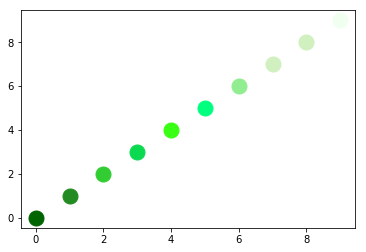

In [876]:
for i in range(10):
    plt.plot(i, i, '.', color=colors[i],  markersize=30)
plt.savefig(folder_name + '/Test.pdf', dpi=1500)  

In [877]:
sigma_multiples = 4

In [878]:
sampled_df.shape

(1024, 129)

In [879]:
sampled_df.describe().transpose()

count        mean        std   min     25%    50%     75%    max
Col1    1024.0  125.248047  51.254859  31.0   89.50  117.0  158.50  220.0
Col2    1024.0  150.040039  48.465458  45.0  129.50  145.0  191.00  225.0
Col3    1024.0  134.053711  49.652222  42.0  104.50  142.0  174.00  205.0
Col4    1024.0  134.069336  38.661577  46.0  100.75  139.5  167.00  195.0
Col5    1024.0  118.694336  54.941676  35.0   76.50  111.0  158.00  227.0
...        ...         ...        ...   ...     ...    ...     ...    ...
Col125  1024.0  123.756836  46.710213  25.0   94.00  124.0  159.00  210.0
Col126  1024.0   99.931641  49.196389  27.0   63.00   87.5  128.25  194.0
Col127  1024.0  110.326172  60.645574  30.0   54.75   98.0  168.00  215.0
Col128  1024.0  151.151367  49.358342  58.0  114.75  179.5  190.00  204.0
L       1024.0    0.625000   0.484359   0.0    0.00    1.0    1.00    1.0

[129 rows x 8 columns]

In [880]:
print(len(sampled_df[sampled_df.L == 0]))
print(len(sampled_df[sampled_df.L == 1]))

384
640



# From Here Started Our Method

In [881]:
label_col_name = 'L'
#num_neighbors = 7
num_neighbors_all = len(select_df)
print(len(select_df))

1024


In [882]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors_all, return_distance=True)  

In [883]:
#knn[0] # Distances with neighbors
#knn[1]  # Indices of neighbours
#select_df.head()    
#knn[0].shape

In [884]:
row_neighbors_list_1 = {}
row_neighbors_dist_1 = {}

for i in range(knn[0].shape[0]):
    row_neighbors_list_1[i] = knn[1][i]
    row_neighbors_dist_1[i] = knn[0][i]
    #print(i, knn[i])


In [885]:
#row_neighbors_list_1

In [886]:
centroids = getCentroids(clusters_labels, sampled_df, features)
centroids_nearest, centroids_nearest_dist = getCentroidNearest(clusters_labels, centroids)

In [887]:
#c_k_o_i_3 = calculate_silhouette_samples(sampled_df, features, file_measures, 'Minimum')
#c_k_o_i_3 = calculate_silhouette_samples_2(sampled_df, features, file_measures, 'Minimum')
c_k_o_i_3 = calculate_silhouette_samples_3(sampled_df, features, clusters_labels, folder_name + '/' + identity_name + '-normal-result2')

500
1000


In [888]:
c_k_o_i_3
#c_k_o_i_3[c_k_o_i_3 == 1] = np.max(c_k_o_i_3)

array([[ 0.29349649, -0.29349649],
       [ 0.30665197, -0.30665197],
       [ 0.40618575, -0.40618575],
       ...,
       [ 0.50308828, -0.50308828],
       [ 0.50844314, -0.50844314],
       [ 0.51877334, -0.51877334]])

In [889]:
c_k_o_i_3_norm = c_k_o_i_3

In [890]:
c_k_o_i_3_norm[c_k_o_i_3_norm == 0]

array([], dtype=float64)

In [936]:
num_clusters_uni = len(np.unique(clusters_labels))
num_clusters_uni

1

In [892]:
clusters_averages = np.zeros((num_clusters_uni, 3))
for i in range(c_k_o_i_3_norm.shape[0]):
    clusters_averages[int(sampled_df.iloc[i]['L'])][0] += c_k_o_i_3_norm[i][int(sampled_df.iloc[i]['L'])]
    clusters_averages[int(sampled_df.iloc[i]['L'])][1] += 1

In [893]:
clusters_averages

array([[169.26143134, 384.        ,   0.        ],
       [391.64750758, 640.        ,   0.        ]])

In [894]:
for i in range(clusters_averages.shape[0]):
    clusters_averages[i][2] = round(clusters_averages[i][0]/clusters_averages[i][1],4)
    print(clusters_averages[i][2])

0.4408
0.6119


In [895]:
clusters_averages

array([[1.69261431e+02, 3.84000000e+02, 4.40800000e-01],
       [3.91647508e+02, 6.40000000e+02, 6.11900000e-01]])

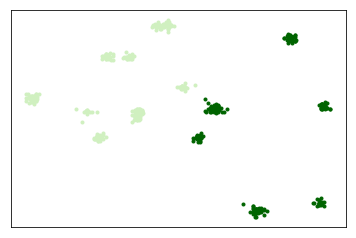

In [896]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


## Again Finding Neighbors for Spatial Filters

In [897]:
label_col_name = 'L'
num_neighbors = 7
#num_neighbors = len(select_df)
#print(len(select_df))

In [898]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=False)  

In [899]:
knn.shape

(1024, 7)

In [900]:
row_neighbors_list = {}

for i in range(knn.shape[0]):
    row_neighbors_list[i] = knn[i]
    #print(i, knn[i])

In [901]:
for index in row_neighbors_list:
    #print((row_neighbors_list[index]))
    mylist = row_neighbors_list[index]
    #print("______________")

In [902]:
def getClustersInside(dataset, c_k_o_i, alpha = 1.0):
    cluster_inside = {}
    cluster_inside = set(cluster_inside)
    dataset['Col2'][0]
    
    clusters_labels = {}
    
    final_list = []
    my_dict = {}
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            if c_k_o_i[i][j] >= alpha:
                #obj = [dataset['Col1'][i], dataset['Col2'][i], j]
                obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_list:
                    final_list.append(obj)
                cluster_inside.add(obj)
                clusters_labels[obj] = j
                
                # Try to keep Maximum Valued Record in a dictionay
                key = (dataset['Col1'][i], dataset['Col2'][i])
                if key in my_dict:
                    if my_dict[key] < c_k_o_i[i][j]:
                        my_dict[key] = c_k_o_i[i][j]
                else:
                    my_dict[key] = c_k_o_i[i][j]

    return clusters_labels, final_list, cluster_inside, my_dict


In [903]:
def getNeighbors(index, cluster_label, c_k_o_i):
    #neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    neighbor_c_k_o_i = np.zeros(num_neighbors)
    out_flag = False
    
    for i in range(num_neighbors):
        neighbor_index = row_neighbors_list[index][i]
        neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
        if int(cluster_label) != int(sampled_df.iloc[neighbor_index]['L']):
            out_flag = True
        
    #Considering neighbors of point as well as point itself
    #neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]

    return neighbor_c_k_o_i, out_flag


In [904]:
def getClustersIn_Out_Part(dataset, c_k_o_i, clusters_averages, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            cluster_neighbors, out_flag = getNeighbors(i,j,c_k_o_i)
            mean = np.mean(cluster_neighbors)
            std = np.std(cluster_neighbors)
            
            if (mean-(3*std) <= c_k_o_i[i][j] <= mean+(3*std)) and not out_flag:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                #print(c_k_o_i[i][j])
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    #print("Removed... " + str(obj))
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Inside 
                #cluster_inside.add(obj)
                clusters_labels[obj] = j

                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                #Cluster outside 
                #cluster_outside.add(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Partial
                #cluster_partial.add(tuple(obj)) 
 
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

            
    #return cluster_inside, cluster_outside, cluster_partial, final_inside, final_outside, final_partial, dict_inside, dict_outside, dict_partial
    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [905]:
def getClustersIn_Out_Part_3(dataset, c_k_o_i, c_k_o_i_2, operator, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            cluster_neighbors, out_flag = getNeighbors(i,j,c_k_o_i)
            mean = np.mean(cluster_neighbors)
            std = np.std(cluster_neighbors)
            
            flag = False
            if operator == 'and':
                if c_k_o_i[i][j] > 0 and c_k_o_i_2[i][j] > 0:
                    flag = True

            elif operator == 'or':
                if c_k_o_i[i][j] > 0 or c_k_o_i_2[i][j] > 0:
                    flag = True
            
            if flag:
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                clusters_labels[obj] = j

                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [906]:
def getClusters_Centroids_MeanDistance(dataset, features_set, label_col_name, knn):
    import math
    
    clusters_labels = np.unique(dataset[label_col_name])        
    clusters_centroids = {}
        
    for i in range(len(clusters_labels)):
        # Get all records of specific cluster
        cluster_dataset = dataset[features_set].loc[dataset[label_col_name] == clusters_labels[i]]
        
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroid = sum_of_cluster/len(cluster_dataset)
        average_distance = 0
        total_distance = 0
        centroid_distances_all = np.zeros(len(cluster_dataset))
        #print("centroid: ", centroid)
        total_average_distances_list = np.zeros(len(cluster_dataset))
        neighbor_distance_list = np.zeros(knn.shape[1])
        j = 0
        for index, o_c in cluster_dataset.iterrows():                                                              
            
            #print("o_c: ", o_c)
            
            centroid_distance = 0
            for col in features_set:
                if col != label_col_name:
                    centroid_distance += (o_c[col] - centroid[col])**2
                    #print(col, ":", (o_c[col] - centroid[col])**2)

            #print("index: ", index)
            for k in range(knn.shape[1]):
                neighbor_distance = 0
                for col in features_set:
                    #print(dataset.iloc[knn[index][k]][col])
                    if col != label_col_name:
                        neighbor_distance += (dataset.iloc[index][col] - dataset.iloc[knn[index][k]][col])**2
            
                neighbor_distance_list[k] =  math.sqrt(neighbor_distance)
                #print(dataset.iloc[knn[index][j]])
            
            centroid_distance = math.sqrt(centroid_distance)
            centroid_distances_all[j] = centroid_distance
            #print(centroid_distance)
            total_distance += centroid_distance
            total_average_distances_list[j] = np.mean(neighbor_distance_list)
            j += 1
        
        #print(total_average_distances_list)
        #print(total_distance)
        centroid_distance_std = np.std(centroid_distances_all)
        
        total_average_distance = np.sum(total_average_distances_list)
        average_distance_std = np.std(total_average_distances_list)
        average_distance_average = total_average_distance/len(cluster_dataset)
        clusters_centroids[clusters_labels[i]] = (centroid,average_distance,average_distance_average, average_distance_std,centroid_distance_std)
    return clusters_centroids

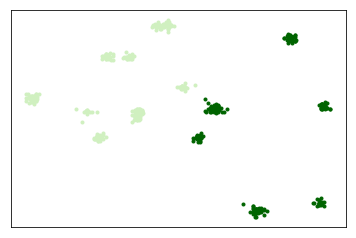

In [907]:
sampled_df.shape
#print(sampled_df)
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')

In [908]:
clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [909]:
#clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [910]:
print("Centroid,  Average_distance, Average_distance_average,  Average_distance_std")
#clusters_centroids

Centroid,  Average_distance, Average_distance_average,  Average_distance_std


import random
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))

colors.append('black')
print("Clusters: ", num_of_clusters)
print("Colors: ", len(colors))


In [911]:
import operator
import math

In [912]:
#Applying Spatial Filters to Get New Evalaution Values

def getUpdatedEvaluationValues(dataset, dataset_neighbors, label_col_name, c_k_o_i, features_set):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    c_k_o_i_mean = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_min = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_max = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_median = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_laplacian = np.zeros((len(dataset),len(clusters_labels)))
    
    #Considering only neighbors of point
    #neighbor_c_k_o_i = np.zeros(num_neighbors)

    #Considering neighbors of point as well as point itself
    neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    
    for cluster_label in clusters_labels:
        for index in row_neighbors_list:
            total_distance= 0
            for i in range(num_neighbors):
                neighbor_index = row_neighbors_list[index][i]
                
                ####################
                distance = 0
                neighbor_obj = dataset.iloc[neighbor_index]
                o_c = dataset.iloc[index]
                
                for col in features_set:
                    if col != label_col_name:
                        distance += (neighbor_obj[col] - o_c[col])**2

                distance = math.sqrt(distance)
                
                average_distance = clusters_centroids[cluster_label][1]
                centroid_distance_std = clusters_centroids[cluster_label][4]
                
                cluster_average_average = clusters_centroids[cluster_label][2]
                cluster_average_std = clusters_centroids[cluster_label][3]
                
                #Code to consider only those neighbors which are in specific radius
                '''
                if distance > (sigma_multiples*cluster_average_std + cluster_average_average):
                    #print("distance", distance)
                    #print("cluster_average_std", cluster_average_std)
                    #print("cluster_average_average", cluster_average_average)
                    #print("3*sigma + Mean", sigma_multiples*cluster_average_std + cluster_average_average)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                '''
                #Code to consider only those neighbors which are in specific radius based on centroid distance
                
                '''
                if distance > (sigma_multiples*centroid_distance_std + average_distance):
                    print("distance", distance)
                    print("centroid_distance_std", centroid_distance_std)
                    print("average_distance", average_distance)
                    print("3*sigma + Mean", sigma_multiples*centroid_distance_std + average_distance)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                else:
                    neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                '''
                
                # Code not consider radius for neighbors
                neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                
                total_distance += distance

            #Considering neighbors of point as well as point itself
            neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]
            
            #neighbor_c_k_o_i = np.sort(neighbor_c_k_o_i)
            
            c_k_o_i_mean[index][int(cluster_label)] =  np.mean(neighbor_c_k_o_i)
            c_k_o_i_min[index][int(cluster_label)] =  np.nanmin(neighbor_c_k_o_i)
            c_k_o_i_max[index][int(cluster_label)] =  np.nanmax(neighbor_c_k_o_i)
            c_k_o_i_median[index][int(cluster_label)] =  np.median(neighbor_c_k_o_i)
            
            laplacian_value = np.sum(neighbor_c_k_o_i[0:num_neighbors]) - neighbor_c_k_o_i[num_neighbors]*(num_neighbors)
            c_k_o_i_laplacian[index][int(cluster_label)] = (laplacian_value-(-num_neighbors))/(num_neighbors-(-num_neighbors))
                
    return c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian

In [913]:
#row_neighbors_list
#plot_custom_clusters_2(c_k_o_i_3_norm, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')


In [914]:
# Normal
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)

# Method 1: Nearest in C / Nearest Not in C
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_norm, features)

# Method 2: Nearest in C / Farthest in C
c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_3_norm, features)

In [915]:
print(len(c_k_o_i_min[c_k_o_i_min  == 0]))
print(len(c_k_o_i_max[c_k_o_i_max  == 0]))
print(len(c_k_o_i_mean[c_k_o_i_mean == 0]))
print(len(c_k_o_i_3_norm[c_k_o_i_3_norm == 0]))

0
0
0
0


In [916]:
write_to_file('../Files/sampled_df.csv', np.array(sampled_df))
write_to_file('../Files/c_k_o_i.csv', c_k_o_i_3_norm)
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)
write_to_file('../Files/c_k_o_i_min.csv', c_k_o_i_min)
write_to_file('../Files/c_k_o_i_max.csv', c_k_o_i_max)
write_to_file('../Files/c_k_o_i_median.csv', c_k_o_i_median)
write_to_file('../Files/c_k_o_i_laplacian.csv', c_k_o_i_laplacian)

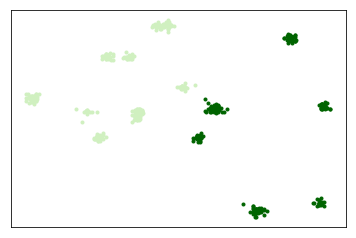

In [917]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


print(len(c_k_o_i[c_k_o_i == 1]))
print(len(c_k_o_i_norm[c_k_o_i_norm == 1]))
print(len(c_k_o_i_min[c_k_o_i_min == 1]))
print(len(c_k_o_i_max[c_k_o_i_max == 1]))

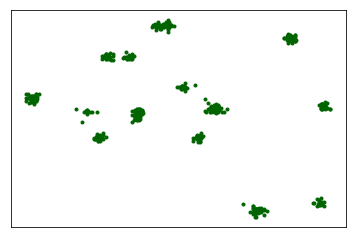

In [918]:
#plot_custom_clusters_2(c_k_o_i_min, clusters_averages, clusters_labels, 5, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result2')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_min, 'and', folder_name + '/' + identity_name + '-minimum-result2')

In [919]:
colors_inside = getColorsInside()

Total Inside:  377
Total Outside:  0
Total Partial:  0


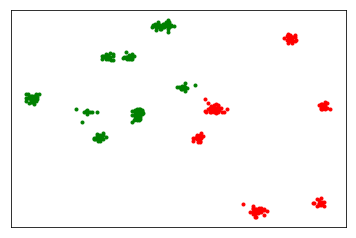

In [920]:
alpha = 1
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_min, 'and', alpha)
print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Minimum (Inside) Plot: ", folder_name + '/' + identity_name + '-minimum-3wc-inside')


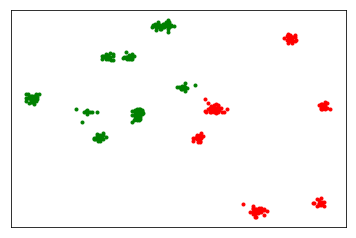

In [921]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Minimum Plot: ", folder_name + '/' + identity_name + '-minimum-3wc-inside')

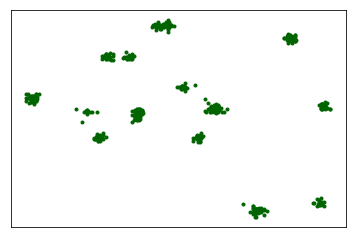

In [922]:
#plot_custom_clusters_2(c_k_o_i_mean, clusters_averages, clusters_labels, 5, "Blurred Evaluation: ", folder_name + '/' + identity_name + '-blurred-result')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_mean, 'and', folder_name + '/' + identity_name + '-blurred-result')

In [923]:
#write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)

In [924]:
c_k_o_i_mean.shape
c_k_o_i_3_norm.shape

(1024, 2)

In [925]:
# plot_custom_clusters_2(c_k_o_i_mean, clusters_averages, clusters_labels, 5, "Blurr Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))


In [926]:
#colors_inside = getColorsInside()
c_k_o_i_mean[c_k_o_i_mean == 0]

array([], dtype=float64)

Total Inside:  377
Total Outside:  0
Total Partial:  0


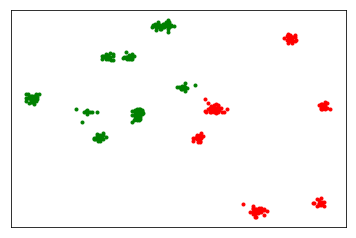

In [927]:
alpha = 1
#clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_mean, alpha)
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_mean, 'and', alpha)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')


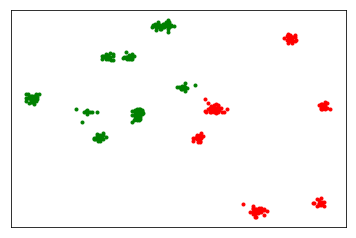

In [928]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Blurr Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')

In [929]:
c_k_o_i_diff = np.zeros((c_k_o_i_3_norm.shape[0],c_k_o_i_3_norm.shape[1]))
for i in range(c_k_o_i_3_norm.shape[0]):
    for j in range(c_k_o_i_3_norm.shape[1]):
        #c_k_o_i_diff[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]
        c_k_o_i_diff[i][j] = c_k_o_i_3_norm[i][j] - c_k_o_i_mean[i][j]

#Sharp Image = Original + Difference
c_k_o_i_sharp = np.zeros((c_k_o_i_3_norm.shape[0],c_k_o_i_3_norm.shape[1]))
for i in range(c_k_o_i_3_norm.shape[0]):
    for j in range(c_k_o_i_3_norm.shape[1]):
        #c_k_o_i_sharp[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]
        c_k_o_i_sharp[i][j] = c_k_o_i_3_norm[i][j] + c_k_o_i_diff[i][j]
        if c_k_o_i_sharp[i][j] > 1:
            c_k_o_i_sharp[i][j] = 1
        

In [930]:
c_k_o_i_sharp.shape

(1024, 2)

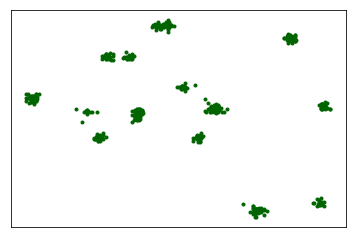

In [931]:
#plot_custom_clusters_2(c_k_o_i_sharp, clusters_averages, clusters_labels, 5, "Sharpe Evaluation: ", folder_name + '/' + identity_name + '-sharpe-result')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_sharp, 'or', folder_name + '/' + identity_name + '-sharpe-result')

Total Inside:  377
Total Outside:  0
Total Partial:  0


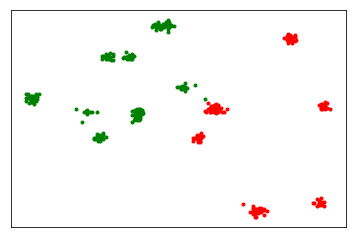

In [932]:
alpha = 1
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_sharp, 'or', alpha)
print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')


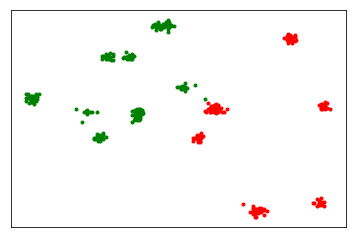

In [933]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')


In [934]:
c_k_o_i_sharp[c_k_o_i_sharp == 0]

array([], dtype=float64)

In [935]:
for i in range(c_k_o_i_mean.shape[0]):
    for i in range(c_k_o_i_mean.shape[1]):
        if c_k_o_i_mean[i][j] > 0 and c_k_o_i_sharp[i][j] <= 0:
            print(i,j)
        if c_k_o_i_sharp[i][j] > 0 and c_k_o_i_mean[i][j] <= 0:
            print(i,j)